<a href="https://colab.research.google.com/github/ame-no-uzume6/EDAPython/blob/main/Actividad1710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Librerías importadas correctamente')

Librerías importadas correctamente


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Programación Soymás/Emisiones_CO2.csv', sep='|', encoding = 'latin1')
df.head()

,Código de país,Nombre del país,Región,Año,CO2 (kt),CO2 per cápita (toneladas métricas)
0,ABW,Aruba,América Latina y Caribe,1960,NaN,NaN
1,ABW,Aruba,América Latina y Caribe,1961,NaN,NaN
2,ABW,Aruba,América Latina y Caribe,1962,NaN,NaN
3,ABW,Aruba,América Latina y Caribe,1963,NaN,NaN
4,ABW,Aruba,América Latina y Caribe,1964,NaN,NaN


In [5]:
print("Columnas del archivo original:")
print(df.columns.tolist())

Columnas del archivo original:
['Código de país', 'Nombre del país', 'Región', 'Año', 'CO2 (kt)', 'CO2 per cápita (toneladas métricas)']


In [6]:
df = df.rename(columns={
    "Código de país": "codigo_pais",
    "Nombre del país": "nombre_pais",
    "Región": "region",
    "Año": "anio",
    "CO2 (kt)": "co2_kt",
    "CO2 per cápita (toneladas métricas)": "co2_per_capita"
})

df.columns.tolist()

['codigo_pais', 'nombre_pais', 'region', 'anio', 'co2_kt', 'co2_per_capita']

In [7]:
print("\nValores nulos por columna:")
print(df.isna().sum())


Valores nulos por columna:
codigo_pais          0
nombre_pais          0
region               0
anio                 0
co2_kt            2095
co2_per_capita    2098
dtype: int64


In [8]:
df = df.dropna(subset=['co2_kt', 'co2_per_capita'])
print("\n Dataset limpio. Vista previa:")
display(df.head())


 Dataset limpio. Vista previa:


,codigo_pais,nombre_pais,region,anio,co2_kt,co2_per_capita
26,ABW,Aruba,América Latina y Caribe,1986,"179,683","2,868319392"
27,ABW,Aruba,América Latina y Caribe,1987,"447,374","7,234964017"
28,ABW,Aruba,América Latina y Caribe,1988,"612,389","10,026507523"
29,ABW,Aruba,América Latina y Caribe,1989,"649,059","10,634732599"
30,ABW,Aruba,América Latina y Caribe,1990,"1.840,83","29,620164768"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9029 entries, 26 to 11126
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   codigo_pais     9029 non-null   object
 1   nombre_pais     9029 non-null   object
 2   region          9029 non-null   object
 3   anio            9029 non-null   int64 
 4   co2_kt          9029 non-null   object
 5   co2_per_capita  9029 non-null   object
dtypes: int64(1), object(5)
memory usage: 493.8+ KB


In [10]:
print("\n Estadísticas descriptivas generales:")
display(df[['co2_kt', 'co2_per_capita']].describe())


 Estadísticas descriptivas generales:


,co2_kt,co2_per_capita
count,9029,9029
unique,5131,9029
top,"47,671","0,691697897"
freq,58,1


In [11]:
df["co2_kt"] = (
    df["co2_kt"]
      .astype(str)
      .str.replace(".", "", regex=False)
      .str.replace(",", ".", regex=False)
)

df["co2_per_capita"] = (
    df["co2_per_capita"]
      .astype(str)
      .str.replace(".", "", regex=False)
      .str.replace(",", ".", regex=False)
)

print(df.dtypes)

df["co2_kt"] = pd.to_numeric(df["co2_kt"], errors="coerce")
df["co2_per_capita"] = pd.to_numeric(df["co2_per_capita"], errors="coerce")

print("\nTipos de datos finales:")
print(df.dtypes)

df.head()

codigo_pais       object
nombre_pais       object
region            object
anio               int64
co2_kt            object
co2_per_capita    object
dtype: object

Tipos de datos finales:
codigo_pais        object
nombre_pais        object
region             object
anio                int64
co2_kt            float64
co2_per_capita    float64
dtype: object


,codigo_pais,nombre_pais,region,anio,co2_kt,co2_per_capita
26,ABW,Aruba,América Latina y Caribe,1986,179.683,2.868319
27,ABW,Aruba,América Latina y Caribe,1987,447.374,7.234964
28,ABW,Aruba,América Latina y Caribe,1988,612.389,10.026508
29,ABW,Aruba,América Latina y Caribe,1989,649.059,10.634733
30,ABW,Aruba,América Latina y Caribe,1990,1840.830,29.620165


In [13]:
print("\t MEDIDAS ESTADÍSTICAS (co2_kt):")
print(f"Media: {df['co2_kt'].mean():.2f}")
print(f"Mediana: {df['co2_kt'].median():.2f}")
print(f"Moda: {df['co2_kt'].mode()[0]:.2f}")
print(f"Desviación estándar: {df['co2_kt'].std():.2f}")
print(f"Varianza: {df['co2_kt'].var():.2f}")
print(f"Rango: {df['co2_kt'].max() - df['co2_kt'].min():.2f}")

	 MEDIDAS ESTADÍSTICAS (co2_kt):
Media: 98629.87
Mediana: 4319.73
Moda: 47.67
Desviación estándar: 466475.65
Varianza: 217599533255.81
Rango: 9019514.55


In [15]:
# 1. Verificamos que exista la columna 'region'
if 'region' not in df.columns:
  raise KeyError("La columna 'region' no se encuentra en el DataFrame.")

In [19]:
# 2. Eliminamos posibles valores nulos y convertimos a texto por seguridad
region_series = df['region'].dropna().astype(str)
print(region_series)

26       América Latina y Caribe
27       América Latina y Caribe
28       América Latina y Caribe
29       América Latina y Caribe
30       América Latina y Caribe
                  ...           
11122        África subsahariana
11123        África subsahariana
11124        África subsahariana
11125        África subsahariana
11126        África subsahariana
Name: region, Length: 9029, dtype: object


In [20]:
# 3. Calculamos la frecuencia absoluta
frecuencia_region = region_series.value_counts().reset_index()
print(frecuencia_region)
frecuencia_region.columns = ['Región', 'Frecuencia Absoluta']
print(frecuencia_region)

                            region  count
0              África subsahariana   2299
1            Europa y Asia Central   1828
2          América Latina y Caribe   1811
3    Asia Oriental y Asia-Pacífico   1504
4  Oriente Medio y Norte de África   1048
5                      Sur de Asia    383
6                     Norteamérica    156
                            Región  Frecuencia Absoluta
0              África subsahariana                 2299
1            Europa y Asia Central                 1828
2          América Latina y Caribe                 1811
3    Asia Oriental y Asia-Pacífico                 1504
4  Oriente Medio y Norte de África                 1048
5                      Sur de Asia                  383
6                     Norteamérica                  156


In [21]:
# 4. Calculamos la frecuencia relativa (%)
total_registros = len(region_series)
frecuencia_region['Frecuencia Relativa (%)'] = (
    frecuencia_region['Frecuencia Absoluta'] / total_registros * 100
).round(2)
print(frecuencia_region)

                            Región  Frecuencia Absoluta  \
0              África subsahariana                 2299   
1            Europa y Asia Central                 1828   
2          América Latina y Caribe                 1811   
3    Asia Oriental y Asia-Pacífico                 1504   
4  Oriente Medio y Norte de África                 1048   
5                      Sur de Asia                  383   
6                     Norteamérica                  156   

   Frecuencia Relativa (%)  
0                    25.46  
1                    20.25  
2                    20.06  
3                    16.66  
4                    11.61  
5                     4.24  
6                     1.73  


In [22]:
# 5. Calculamos las frecuencias acumuladas
frecuencia_region['Frecuencia Absoluta Acumulada'] = (
    frecuencia_region['Frecuencia Absoluta'].cumsum()
)
print(frecuencia_region)
frecuencia_region['Frecuencia Relativa Acumulada (%)'] = (
    frecuencia_region['Frecuencia Relativa (%)'].cumsum().round(2)
)
print(frecuencia_region)

                            Región  Frecuencia Absoluta  \
0              África subsahariana                 2299   
1            Europa y Asia Central                 1828   
2          América Latina y Caribe                 1811   
3    Asia Oriental y Asia-Pacífico                 1504   
4  Oriente Medio y Norte de África                 1048   
5                      Sur de Asia                  383   
6                     Norteamérica                  156   

   Frecuencia Relativa (%)  Frecuencia Absoluta Acumulada  
0                    25.46                           2299  
1                    20.25                           4127  
2                    20.06                           5938  
3                    16.66                           7442  
4                    11.61                           8490  
5                     4.24                           8873  
6                     1.73                           9029  
                            Región  Frecuencia 

In [23]:
# 6. Mostramos la tabla final
print("\nTabla de Frecuencia por Región:")
display(frecuencia_region)


Tabla de Frecuencia por Región:


,Región,Frecuencia Absoluta,Frecuencia Relativa (%),Frecuencia Absoluta Acumulada,Frecuencia Relativa Acumulada (%)
0,África subsahariana,2299,25.46,2299,25.46
1,Europa y Asia Central,1828,20.25,4127,45.71
2,América Latina y Caribe,1811,20.06,5938,65.77
3,Asia Oriental y Asia-Pacífico,1504,16.66,7442,82.43
4,Oriente Medio y Norte de África,1048,11.61,8490,94.04
5,Sur de Asia,383,4.24,8873,98.28
6,Norteamérica,156,1.73,9029,100.01


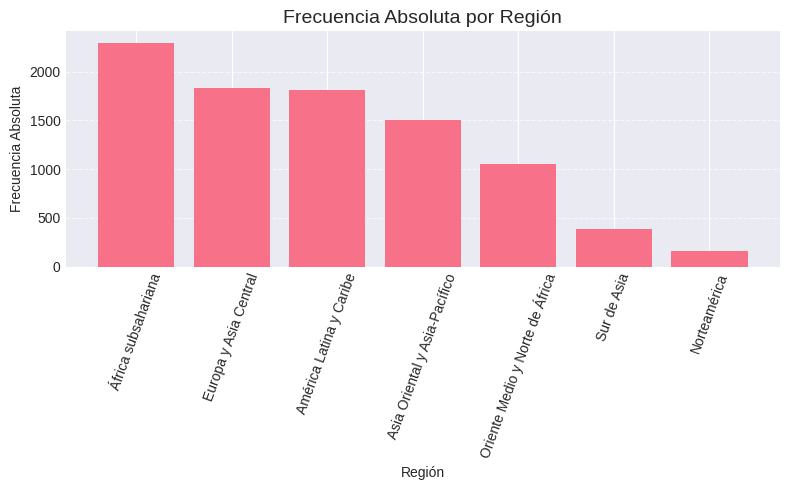

In [46]:
# GRÁFICO DE BARRAS
plt.figure(figsize=(8, 5))
plt.bar(frecuencia_region['Región'], frecuencia_region['Frecuencia Absoluta'])
plt.title('Frecuencia Absoluta por Región', fontsize=14)
plt.xlabel('Región')
plt.ylabel('Frecuencia Absoluta')
plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


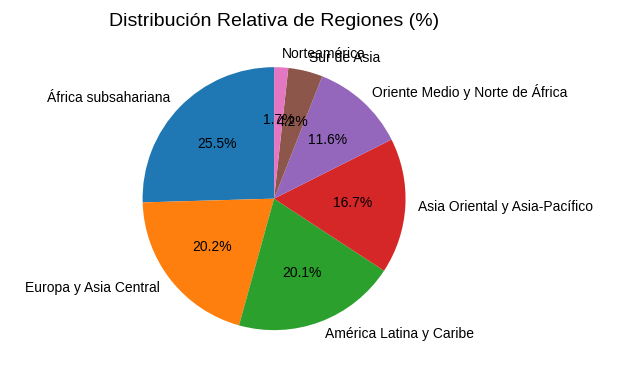

In [32]:
# GRÁFICO CIRCULAR (PIE CHART)
plt.figure(figsize=(6, 6))
plt.pie(
    frecuencia_region['Frecuencia Relativa (%)'],
    labels=frecuencia_region['Región'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribución Relativa de Regiones (%)', fontsize=14)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


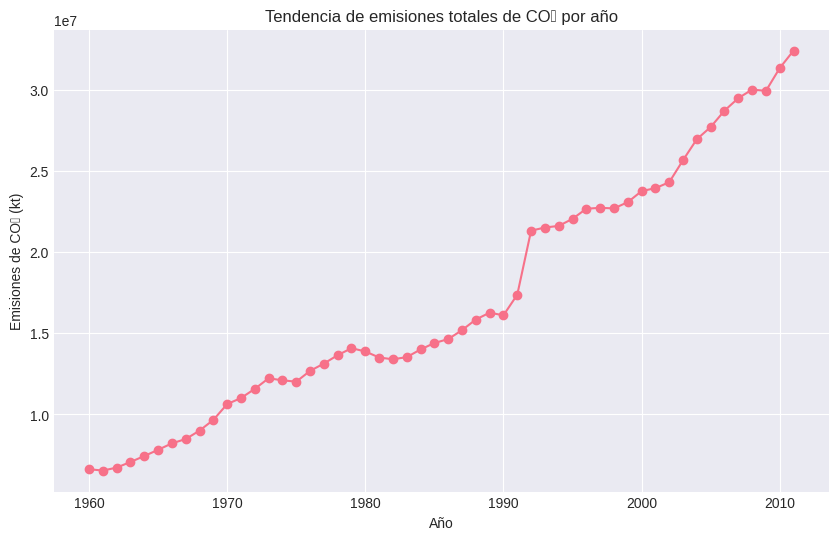

In [36]:
emisiones_anuales = df.groupby('anio')['co2_kt'].sum()

plt.figure(figsize=(10,6))
plt.plot(emisiones_anuales.index, emisiones_anuales.values, marker='o')
plt.title("Tendencia de emisiones totales de CO₂ por año")
plt.xlabel("Año")
plt.ylabel("Emisiones de CO₂ (kt)")
plt.grid(True)
plt.show()

region
Norteamérica                       1.706050e+06
Asia Oriental y Asia-Pacífico      1.586082e+05
Europa y Asia Central              1.237671e+05
Sur de Asia                        1.080753e+05
Oriente Medio y Norte de África    4.593898e+04
América Latina y Caribe            2.677727e+04
África subsahariana                9.378770e+03
Name: co2_kt, dtype: float64


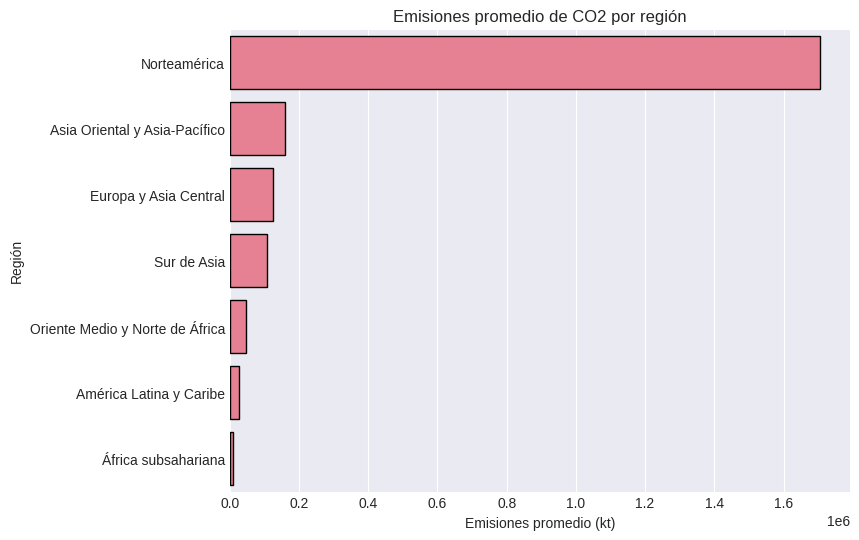

In [38]:
emisiones_region = df.groupby('region')['co2_kt'].mean().sort_values(ascending=False)
print(emisiones_region)

plt.figure(figsize=(8,6))
sns.barplot(x=emisiones_region.values, y=emisiones_region.index, edgecolor='black')
plt.title("Emisiones promedio de CO2 por región")
plt.xlabel("Emisiones promedio (kt)")
plt.ylabel("Región")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


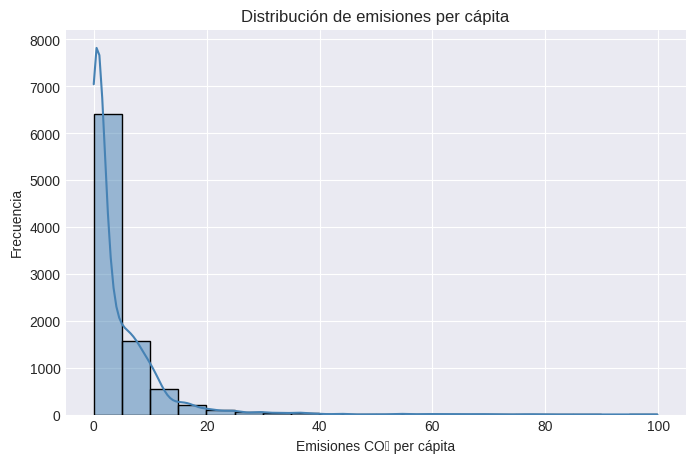

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df['co2_per_capita'], bins=20, kde=True, color='steelblue')
plt.title("Distribución de emisiones per cápita")
plt.xlabel("Emisiones CO₂ per cápita")
plt.ylabel("Frecuencia")
plt.show()

In [41]:
resumen_region = df.groupby('region')[['co2_kt', 'co2_per_capita']].agg(['mean', 'median', 'std']).round(2)
display(resumen_region)
resumen_region.columns = ['Media_CO2_kt', 'Mediana_CO2_kt', 'DesvStd_CO2_kt',
                          'Media_CO2_per_capita', 'Mediana_CO2_per_capita', 'DesvStd_CO2_per_capita']
display(resumen_region)

co2_kt                         \
                                       mean     median         std   
region                                                               
América Latina y Caribe            26777.27    2541.23    66758.29   
Asia Oriental y Asia-Pacífico     158608.18    3481.82   650716.04   
Europa y Asia Central             123767.12   48629.92   226091.68   
Norteamérica                     1706050.08  430676.32  2181037.78   
Oriente Medio y Norte de África    45938.98   18619.20    79974.37   
Sur de Asia                       108075.28    3241.63   313686.75   
África subsahariana                 9378.77     902.08    45509.09   

                                co2_per_capita                
                                          mean median    std  
region                                                        
América Latina y Caribe                   3.08   1.61   5.02  
Asia Oriental y Asia-Pacífico             3.97   1.26   6.26  
Europa y Asia Central                     7.49   7.08   4.97  
Norteamérica                             14.06  16.20   5.47  
Oriente Medio y Norte de África           9.58   3.24  15.58  
Sur de Asia                               0.43   0.28   0.50  
África subsahariana                       0.68   0.19   1.62

,Media_CO2_kt,Mediana_CO2_kt,DesvStd_CO2_kt,Media_CO2_per_capita,Mediana_CO2_per_capita,DesvStd_CO2_per_capita
region,,,,,,
América Latina y Caribe,26777.27,2541.23,66758.29,3.08,1.61,5.02
Asia Oriental y Asia-Pacífico,158608.18,3481.82,650716.04,3.97,1.26,6.26
Europa y Asia Central,123767.12,48629.92,226091.68,7.49,7.08,4.97
Norteamérica,1706050.08,430676.32,2181037.78,14.06,16.20,5.47
Oriente Medio y Norte de África,45938.98,18619.20,79974.37,9.58,3.24,15.58
Sur de Asia,108075.28,3241.63,313686.75,0.43,0.28,0.50
África subsahariana,9378.77,902.08,45509.09,0.68,0.19,1.62


In [47]:
ruta_guardado = '/content/drive/MyDrive/Colab Notebooks/Programación Soymás/Emisiones_CO2_limpio.csv'

# recordar ajustar la ruta a tu google drive

df.to_csv(ruta_guardado, index=False)
print(f"\n Archivo limpio guardado en tu Drive como: {ruta_guardado}")

# (Opcional) guardar la tabla de frecuencia:
ruta_frecuencia = '/content/drive/MyDrive/Colab Notebooks/Programación Soymás/frecuencia_region.csv'

frecuencia_region.to_csv(ruta_frecuencia, index=False)
print(f" Tabla de frecuencia guardada como: {ruta_frecuencia}")


 Archivo limpio guardado en tu Drive como: /content/drive/MyDrive/Colab Notebooks/Programación Soymás/Emisiones_CO2_limpio.csv
 Tabla de frecuencia guardada como: /content/drive/MyDrive/Colab Notebooks/Programación Soymás/frecuencia_region.csv
